<a href="https://colab.research.google.com/github/Ranjankumar666/Mask_Detector_CNN/blob/main/Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [35]:
! kaggle datasets download -d ahemateja19bec1025/facemask-dataset

 97% 49.0M/50.4M [00:01<00:00, 21.3MB/s]
100% 50.4M/50.4M [00:01<00:00, 27.6MB/s]


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! unzip /content/face-mask-detection.zip

Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [36]:
! unzip /content/facemask-dataset.zip

Archive:  /content/facemask-dataset.zip
  inflating: dataset/dataset/0/0.jpg  
  inflating: dataset/dataset/0/1.jpg  
  inflating: dataset/dataset/0/10.jpg  
  inflating: dataset/dataset/0/100.jpg  
  inflating: dataset/dataset/0/101.jpg  
  inflating: dataset/dataset/0/102.jpg  
  inflating: dataset/dataset/0/104.jpg  
  inflating: dataset/dataset/0/105.jpg  
  inflating: dataset/dataset/0/106.jpg  
  inflating: dataset/dataset/0/107.jpg  
  inflating: dataset/dataset/0/108.jpg  
  inflating: dataset/dataset/0/109.jpg  
  inflating: dataset/dataset/0/11.jpg  
  inflating: dataset/dataset/0/110.jpg  
  inflating: dataset/dataset/0/111.jpg  
  inflating: dataset/dataset/0/112.jpg  
  inflating: dataset/dataset/0/114.jpg  
  inflating: dataset/dataset/0/115.jpg  
  inflating: dataset/dataset/0/116.jpg  
  inflating: dataset/dataset/0/117.jpg  
  inflating: dataset/dataset/0/118.jpg  
  inflating: dataset/dataset/0/119.jpg  
  inflating: dataset/dataset/0/12.jpg  
  inflating: dataset/dat

In [38]:
! rm -rf ./images

In [40]:
! rm -rf ./annotations

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
import os
import random 
def choose_rand_img(path):
    dir_files = os.listdir(path)
    selection = random.choice(dir_files)
    img = plt.imread(f'{path}/{selection}')
    plt.imshow(img)
    print(f"shape: {img.shape}")

    return img

shape: (428, 320, 3)


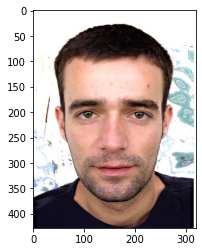

In [41]:
img = choose_rand_img('/content/dataset/dataset/0')

shape: (350, 622, 3)


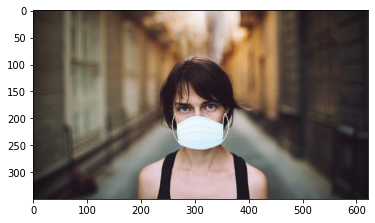

In [42]:
img = choose_rand_img('/content/dataset/dataset/1')

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size= (224, 224)
batch_size=32
seed=42
data_path = '/content/dataset/dataset/'

data_gen = ImageDataGenerator(rescale=1./255,  validation_split=0.3)

train_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='training', seed=42, class_mode='binary'  ) 
test_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='validation', seed=42, class_mode='binary' ) 


Found 964 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [88]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='elu'),
      tf.keras.layers.Conv2D(10, 3,  activation='elu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3,  activation='elu'),
      tf.keras.layers.Conv2D(10, 3,  activation='elu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, 'sigmoid')
])

model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')

model1.fit(train_data,epochs=5,  steps_per_epoch=len(train_data), validation_data=test_data,  validation_steps=len(test_data) )

Epoch 1/5
31/31 [==============================] - 8s 232ms/step - loss: 0.3513 - accuracy: 0.8330 - val_loss: 0.1637 - val_accuracy: 0.9296
Epoch 2/5
31/31 [==============================] - 6s 210ms/step - loss: 0.1155 - accuracy: 0.9595 - val_loss: 0.1599 - val_accuracy: 0.9490
Epoch 3/5
31/31 [==============================] - 7s 212ms/step - loss: 0.0749 - accuracy: 0.9699 - val_loss: 0.1711 - val_accuracy: 0.9563
Epoch 4/5
31/31 [==============================] - 6s 210ms/step - loss: 0.0659 - accuracy: 0.9761 - val_loss: 0.2046 - val_accuracy: 0.9490
Epoch 5/5
31/31 [==============================] - 6s 211ms/step - loss: 0.0523 - accuracy: 0.9855 - val_loss: 0.2010 - val_accuracy: 0.9539


In [79]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 14)      1274      
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 14)      1778      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 14)       0         
 2D)                                                  

In [86]:
# Real image with mask
!wget https://www.henryford.com/-/media/henry-ford-blog/images/interior-banner-images/2020/07/mask-myths.jpg?h=785&la=en&w=1920&hash=ADC164567A8E9350E957ACDCFEF2F78C


--2022-02-03 18:30:18--  https://www.henryford.com/-/media/henry-ford-blog/images/interior-banner-images/2020/07/mask-myths.jpg?h=785
Resolving www.henryford.com (www.henryford.com)... 172.67.22.86, 104.22.68.148, 104.22.69.148, ...
Connecting to www.henryford.com (www.henryford.com)|172.67.22.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144648 (141K) [image/jpeg]
Saving to: ‘mask-myths.jpg?h=785’

mask-myths.jpg?h=78 100%[===================>] 141.26K   326KB/s    in 0.4s    

2022-02-03 18:30:20 (326 KB/s) - ‘mask-myths.jpg?h=785’ saved [144648/144648]



In [87]:
img2 = image.load_img('/content/mask-myths.jpg', target_size=img_size)
x = image.img_to_array(img2)
x = x.reshape((1,) + x.shape)

model1.predict([x])

array([[1.]], dtype=float32)

In [89]:
! wget https://static01.nyt.com/images/2020/04/10/video/HowToMakeAMask_Cover_1/HowToMakeAMask_Cover_1-square640.jpg

--2022-02-03 18:35:13--  https://static01.nyt.com/images/2020/04/10/video/HowToMakeAMask_Cover_1/HowToMakeAMask_Cover_1-square640.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66512 (65K) [image/jpeg]
Saving to: ‘HowToMakeAMask_Cover_1-square640.jpg’

HowToMakeAMask_Cove 100%[===================>]  64.95K  --.-KB/s    in 0.01s   

2022-02-03 18:35:13 (4.34 MB/s) - ‘HowToMakeAMask_Cover_1-square640.jpg’ saved [66512/66512]



In [90]:
img3 = image.load_img('/content/HowToMakeAMask_Cover_1-square640.jpg', target_size=img_size)
x = image.img_to_array(img2)
x = x.reshape((1,) + x.shape)

model1.predict([x])

array([[1.]], dtype=float32)